In [1]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# What is the most optimal skill to learn for Data Analysts?

Methodology
1. Group skills to determine median salary & likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [5]:
# Filter df for US and MY data analyst
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_my = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')]

## US Data

In [11]:
# Dropping missing values for salary column
df_us = df_us.dropna(subset = 'salary_year_avg')

# Explode skill list into individual rows
df_us_exploded = df_us.explode('job_skills').copy()
df_us_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [12]:
# Group data based on median salary and skill count
df_us_skills = df_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count',ascending= False)

In [16]:
# Renaming columns
df_us_skills = df_us_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [19]:
# How many data analyst job postings in US?
us_jobcount = len(df_us)

# Calculate the skill percentage in df_us_skills
df_us_skills['skill_percent'] = (df_us_skills['skill_count'] / us_jobcount) * 100
df_us_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [30]:
# Filter skill_precent data to be greater than 5%
skills_percent = 5
df_us_skills_filter = df_us_skills[df_us_skills['skill_percent'] > skills_percent]
df_us_skills_filter


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


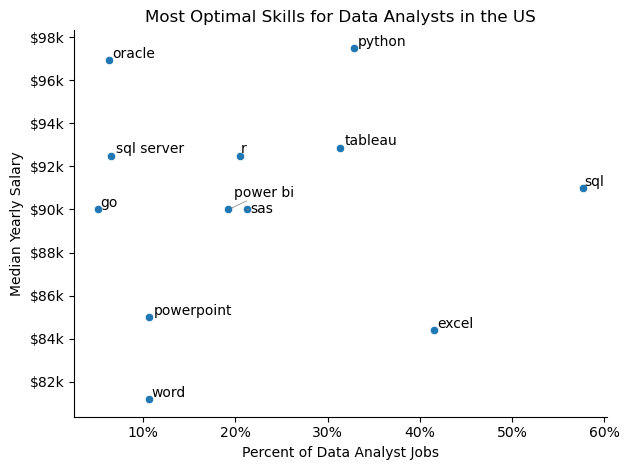

In [78]:
# Plotting time
sns.scatterplot(data=df_us_skills_filter, 
                x = 'skill_percent', 
                y = 'median_salary')
sns.despine()

# Putting in text labels for each dots
texts = [] # create list
for i, txt in enumerate(df_us_skills_filter.index):
    texts.append(plt.text
                 (df_us_skills_filter['skill_percent'].iloc[i], 
                  df_us_skills_filter['median_salary'].iloc[i], 
                  txt))

# Adjust Text distance from dots and overlaps
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Changing y-axis labelling & add percentage to x-axis
from matplotlib.ticker import PercentFormatter 
ax = plt.gca() #Get axis and use ax-related functions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

# Customization
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')

plt.tight_layout()

In [51]:
# Advanced Customization

# Color by Technology, extract all skills dictionary
df_technology = df['job_type_skills'].copy()

# Removing duplicates
df_technology.drop_duplicates(inplace = True)

# Removing missing values
df_technology.dropna(inplace=True)

# Combining all dictionaries into one single variable
technology_dict = {} # Create dict variable
for row in df_technology:
    # Convert str to dict
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technlogy_dict add value to existing value
            technology_dict[key] += value
        else:                      # if key does not exists in technology_dict, add key and value
            technology_dict[key] = value

# Remove duplicates by converting values to set back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ssis',
  'spss',
  'msaccess',
  'dax',
  'spreadsheet',
  'microstrategy',
  'word',
  'sas',
  'sharepoint',
  'powerbi',
  'cognos',
  'sap',
  'powerpoint',
  'outlook',
  'splunk',
  'visio',
  'nuix',
  'datarobot',
  'excel',
  'looker',
  'alteryx',
  'tableau',
  'ms access',
  'power bi',
  'esquisse',
  'qlik',
  'sheets',
  'ssrs'],
 'programming': ['scala',
  'mongo',
  't-sql',
  'clojure',
  'apl',
  'java',
  'erlang',
  'groovy',
  'shell',
  'matlab',
  'javascript',
  'perl',
  'kotlin',
  'r',
  'sass',
  'go',
  'powershell',
  'typescript',
  'php',
  'sql',
  'swift',
  'sas',
  'mongodb',
  'fortran',
  'ruby',
  'visualbasic',
  'vb.net',
  'cobol',
  'haskell',
  'delphi',
  'pascal',
  'no-sql',
  'f#',
  'c#',
  'objective-c',
  'rust',
  'html',
  'python',
  'ocaml',
  'c++',
  'julia',
  'crystal',
  'c',
  'css',
  'dart',
  'elixir',
  'golang',
  'assembly',
  'nosql',
  'visual basic',
  'lua',
  'solidity',
  'lisp',
  'bash',
  '

In [53]:
# Turn dict into df
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ssis
0,analyst_tools,spss
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,spreadsheet
...,...,...
9,sync,rocketchat
9,sync,wire
9,sync,microsoft teams
9,sync,mattermost


In [59]:
# Merging df_technology and df_us_skills
df_us_skills_tech = df_us_skills.merge(df_technology, left_on='job_skills', right_on = 'skills')

df_us_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


In [96]:
# Refilter to only include skills percent > 5%
df_us_skills_tech_filter = df_us_skills_tech[df_us_skills_tech['skill_percent'] > skills_percent]
df_us_skills_tech_filter

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


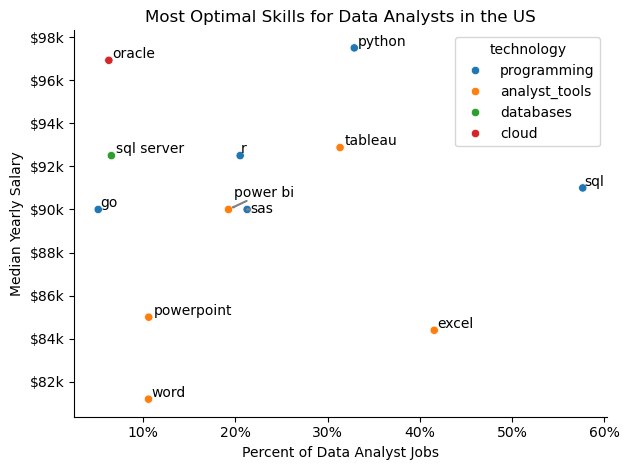

In [97]:
# Replotting with technology coloring 
sns.scatterplot(
    data=df_us_skills_tech_filter, 
    x = 'skill_percent', 
    y = 'median_salary',
    hue = 'technology')
sns.despine()

# Putting in text labels for each dots
texts = [] # create list
for i, txt in enumerate(df_us_skills_filter.index):
    texts.append(plt.text(
        df_us_skills_filter['skill_percent'].iloc[i], 
        df_us_skills_filter['median_salary'].iloc[i], 
        txt))

# Adjust Text distance from dots and overlaps
adjust_text(texts, arrowprops=dict(
    arrowstyle='->', 
    color='gray'),
    lw = 1.5) 

# Changing y-axis labelling & add percentage to x-axis
from matplotlib.ticker import PercentFormatter 
ax = plt.gca() #Get axis and use ax-related functions
ax.yaxis.set_major_formatter(plt.FuncFormatter
                             (lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter
                             (decimals = 0))

# Customization
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')

plt.tight_layout()
plt.show()

## MY Data

In [99]:
# Dropping missing values for salary column
df_my = df_my.dropna(subset = 'salary_year_avg')

# Explode skill list into individual rows
df_my_exploded = df_my.explode('job_skills').copy()
df_my_exploded.head(8)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,python,"{'analyst_tools': ['tableau'], 'programming': ..."
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,r,"{'analyst_tools': ['tableau'], 'programming': ..."
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,tableau,"{'analyst_tools': ['tableau'], 'programming': ..."
21523,Data Analyst,"Data Analyst (Customer Service Industry, Manda...",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 13:31:41,False,False,Malaysia,year,111175.0,NaN,OKX,tableau,"{'analyst_tools': ['tableau', 'excel'], 'other..."
21523,Data Analyst,"Data Analyst (Customer Service Industry, Manda...",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 13:31:41,False,False,Malaysia,year,111175.0,NaN,OKX,excel,"{'analyst_tools': ['tableau', 'excel'], 'other..."
21523,Data Analyst,"Data Analyst (Customer Service Industry, Manda...",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 13:31:41,False,False,Malaysia,year,111175.0,NaN,OKX,flow,"{'analyst_tools': ['tableau', 'excel'], 'other..."
22043,Data Analyst,Junior Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-03-08 13:53:25,True,False,Malaysia,year,53014.0,NaN,Carousell Group,sql,"{'analyst_tools': ['looker', 'tableau'], 'prog..."


In [100]:
# Group data based on median salary and skill count
df_my_skills = df_my_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count',ascending= False)

# Renaming columns
df_my_skills = df_my_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# How many data analyst job postings in US?
my_jobcount = len(df_my)

# Calculate the skill percentage in df_my_skills
df_my_skills['skill_percent'] = (df_my_skills['skill_count'] / my_jobcount) * 100
df_my_skills

,skill_count,median_salary,skill_percent
job_skills,,,
excel,5,111175.0,45.454545
python,5,64800.0,45.454545
sql,5,79200.0,45.454545
tableau,5,79200.0,45.454545
looker,3,79200.0,27.272727
flow,2,87987.5,18.181818
r,2,57907.0,18.181818
azure,1,111175.0,9.090909
bigquery,1,111175.0,9.090909


In [101]:
# Merging df_technology and df_my_skills
df_my_skills_tech = df_my_skills.merge(df_technology, left_on='job_skills', right_on = 'skills')

df_my_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,5,111175.0,45.454545,analyst_tools,excel
1,5,64800.0,45.454545,programming,python
2,5,79200.0,45.454545,programming,sql
3,5,79200.0,45.454545,analyst_tools,tableau
4,3,79200.0,27.272727,analyst_tools,looker
5,2,87987.5,18.181818,other,flow
6,2,57907.0,18.181818,programming,r
7,1,111175.0,9.090909,cloud,azure
8,1,111175.0,9.090909,cloud,bigquery
9,1,50400.0,9.090909,cloud,oracle


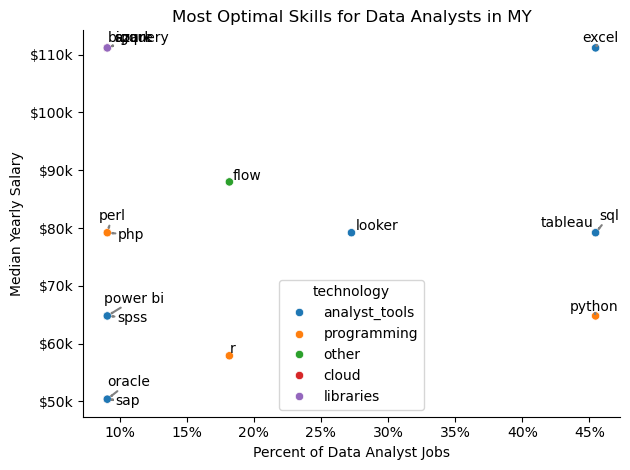

In [103]:
# Replotting with technology coloring 
sns.scatterplot(
    data=df_my_skills_tech, 
    x = 'skill_percent', 
    y = 'median_salary',
    hue = 'technology')
sns.despine()

# Putting in text labels for each dots
texts = [] # create list
for i, txt in enumerate(df_my_skills.index):
    texts.append(plt.text(
        df_my_skills['skill_percent'].iloc[i], 
        df_my_skills['median_salary'].iloc[i], 
        txt))

# Adjust Text distance from dots and overlaps
adjust_text(texts, arrowprops=dict(
    arrowstyle='->', 
    color='gray'),
    lw = 1.5) 

# Changing y-axis labelling & add percentage to x-axis
from matplotlib.ticker import PercentFormatter 
ax = plt.gca() #Get axis and use ax-related functions
ax.yaxis.set_major_formatter(plt.FuncFormatter
                             (lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter
                             (decimals = 0))

# Customization
plt.title('Most Optimal Skills for Data Analysts in MY')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')

plt.tight_layout()
plt.show()